In [1]:
import numpy as np
import os, json, re
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.mstats import gmean
from cycler import cycler
import statistics
import seaborn as sns
import matplotlib.patches as mpatches
import os
cwd = os.getcwd()


# Read IEA data 

In [2]:
# GW get information about the electricity capacity in the US
elec_gen = pd.read_csv(cwd+"/data/capacity.csv") # from IAE
elec_gen = elec_gen.T
header_row = 0
elec_gen.columns = elec_gen.iloc[header_row]
elec_gen.head()
elec_gen.columns = ['coal', 'gas', 'wind', 'diesel', 'nuclear','hydro', 'oil', 'solar', 'total']

In [3]:
# Bln kwh get information about the electricity generation in the US
gen = pd.read_csv(cwd+"/data/generation.csv") # from IEA
gen = gen.T
header_row = 0
gen.columns = gen.iloc[header_row]
gen.columns = ['coal', 'gas', 'wind', 'nuclear','hydro', 'oil', 'solar', 'total']


In [4]:
gen=gen.apply(pd.to_numeric, errors='coerce')
gen=gen.iloc[1: , :].dropna(how='all')
gen=gen.iloc[: , :-1] #drop the last "Total" column
gen.to_csv('generation.csv')

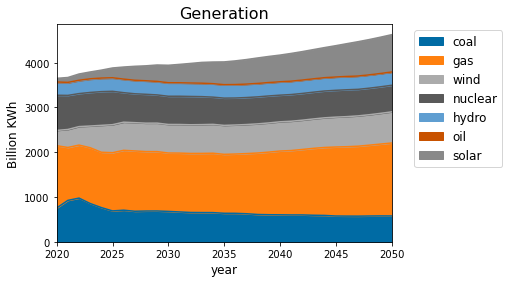

In [5]:
#def_cycler = (cycler(color = ['r', 'g', 'b', 'y', 'c', 'gold', 'm']))
plt.style.use('tableau-colorblind10')
gen.plot.area()
plt.xlim([0, 30])
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes')
plt.title("Generation", fontsize = 16)
plt.xlabel("year", fontsize = 12)
plt.ylabel("Billion KWh", fontsize = 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12})
plt.savefig('./plots/generation.jpg', bbox_inches='tight', dpi=900)

In [6]:
elec_gen=elec_gen.apply(pd.to_numeric, errors='coerce')
elec_gen=elec_gen.iloc[1: , :].dropna(how='all')
elec_gen=elec_gen.dropna(how='all', axis=1)

In [7]:
new_cols = ["coal",	"gas",	"wind", "nuclear", "hydro",	"oil","solar","diesel"]
elec_gen=elec_gen[new_cols]
elec_gen=elec_gen.iloc[: , :-1] #drop the last "Total" column


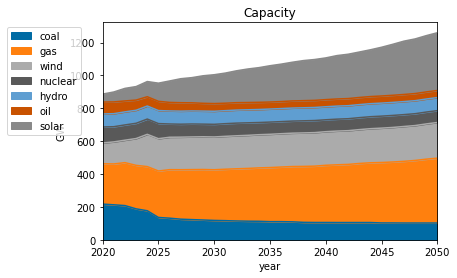

In [8]:
#def_cycler1 = (cycler(color = ['b', 'g', 'b', 'coral', 'y', 'c', 'gold', 'm']))

plt.style.use('tableau-colorblind10')
elec_gen.plot.area()
plt.rc('axes')
plt.xlim([0, 30])
fontsize = 12
plt.title("Capacity", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("GW", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.3, 1), loc='upper left', prop={'size': 10})

plt.savefig('./plots/capacity.jpg', bbox_inches='tight', dpi=900)

elec_gen.to_csv('capacity.csv')
gen.to_csv('generation.csv')

# find the decomissioning and constructions

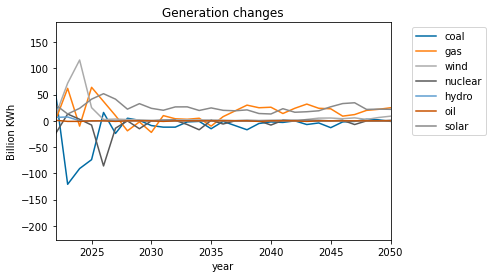

In [9]:
chang_g = gen.diff()  #find difference in annual generation
chang_g.plot()
plt.title("Generation changes")
plt.xlabel("year")
plt.ylabel("Billion KWh")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([2, 30])
plt.show()

(2.0, 30.0)

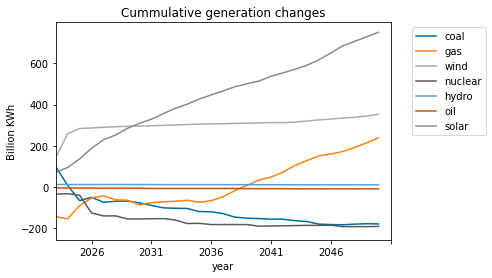

In [10]:
g=chang_g.iloc[1: , :].cumsum()
g.plot()
plt.title("Cummulative generation changes")
plt.xlabel("year")
plt.ylabel("Billion KWh")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([2, 30])


In [11]:
chang_g
chang_g.to_csv('gener_cum_changes.csv')

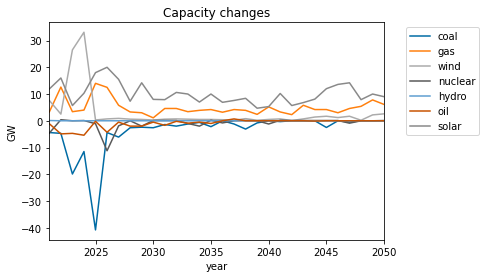

In [12]:
changes_cap = elec_gen.diff()  #capacity changes
changes_cap.plot()
plt.title("Capacity changes")
plt.xlabel("year")
plt.ylabel("GW")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([1, 30])
plt.show()

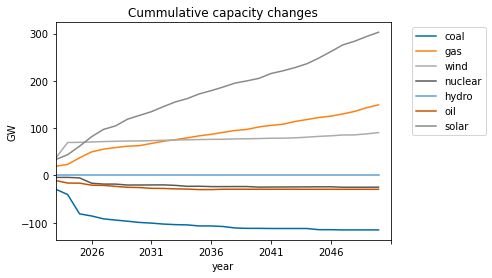

In [13]:
generation=changes_cap.iloc[1: , :].cumsum()
generation.plot()
plt.title("Cummulative capacity changes")
plt.xlabel("year")
plt.ylabel("GW")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([2, 30])
plt.show()
generation.to_csv('cap_cum_changes.csv')

In [14]:
changes_cap=changes_cap.iloc[1: , :]
changes_cap.head(2)

,coal,gas,wind,nuclear,hydro,oil,solar
2021,-4.4,3.3,7.6,-4.6,0.1,-1.1,11.9
2022,-4.7,12.6,2.5,0.4,0.0,-4.9,16.0


In [15]:
total_elec = elec_gen.sum(axis=1)

In [16]:
constructions = changes_cap[(changes_cap >0)].dropna(how='all', axis=1)
constructions = constructions.fillna(0)

In [17]:
decommission = changes_cap[(changes_cap < 0)].dropna(how='all', axis=1)
decommission = decommission.fillna(0)
decommissions=abs(decommission)

# read data from json files

In [18]:
#read json data 

path_to_json = cwd+'/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_data.json')]
    

def energy_frame_add(energy_frame, new_entry):
    energy_frame.loc[len(energy_frame.index)] = new_entry

def process_next_level(current_source, a, previous_keys, energy_frame):  #а - текущий уровень
    current_keys = a.keys() #keys to the deeper level 
    
    if "val" in current_keys:
        new_thing_to_add = [current_source] + previous_keys[1:] + [a["val"]] + [a["unit"]]  #excluding word "data"
#         print(new_thing_to_add)
        energy_frame_add(energy_frame, new_thing_to_add)
    else:
        for key in current_keys:
#             print(key)
            if key != "bib":
                process_next_level(current_source, a.get(key), previous_keys + [key], energy_frame)  # "a.get(key)"" - returns understructure (recursive structure). remembers previous keys but at the same time knows where it is 
    

# process_next_level(a_dict, energy_frame)
keys_list = []


# #create a data frame for info from json


In [19]:
energy_frame = pd.DataFrame(columns=[ "source", "stream",  "material", "value",  "unit"])
materials_portfolio = pd.DataFrame
df = list()

#energy_frame.add
for index, js in enumerate(json_files):
    file_path = os.path.join(path_to_json, js)    
    with open(file_path) as json_file:
        energy_data = pd.read_json(js)
        current_source = js.split('_')[0]
        #print(current_source)
        process_next_level(current_source, energy_data, keys_list, energy_frame)
        energy_frame
    energy_s = energy_frame.append(energy_frame, ignore_index=True)


In [20]:
energy_s = energy_s.drop_duplicates()
#energy_s[energy_s["material"].str.contains("refueling")==False]
energy_s.head(2)


NameError: name 'energy_s' is not defined

# Visualisations and results


In [21]:
del decommissions['oil']


In [22]:
#decom = decommissions.T
#decommissions

In [23]:
#decom.index.name = 'source'
#decom

In [24]:
del constructions['oil']

#constr= constructions.T

In [25]:
#constr.index.name = 'source'


In [26]:
energy_s = pd.read_csv(cwd+"//data//model_data_f.csv")



Calculate total need and waste per source 

In [27]:
total_waste=energy_s[energy_s['stream'].str.contains('waste')].groupby(["source"],  as_index=False).sum()
total_need=energy_s[energy_s['stream'].str.contains('need')].groupby(["source"],  as_index=False).sum()


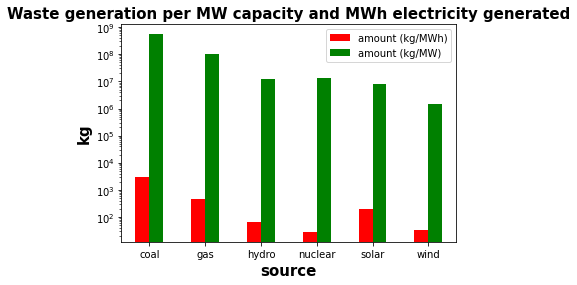

In [28]:
plt.style.use('tableau-colorblind10')
ax = total_waste.plot.bar(x='source', y=['amount (kg/MWh)',"amount (kg/MW)"], color=['red', 'green'], rot=0)
ax.set_yscale('log')
plt.title("Waste generation per MW capacity and MWh electricity generated",fontweight ='bold', fontsize = 15)
plt.ylabel("kg", fontweight ='bold', fontsize = 15)
plt.xlabel("source", fontweight ='bold', fontsize = 15)
ax.set_facecolor('white')

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.savefig('./plots/barplot1.jpg', bbox_inches='tight', dpi=900)

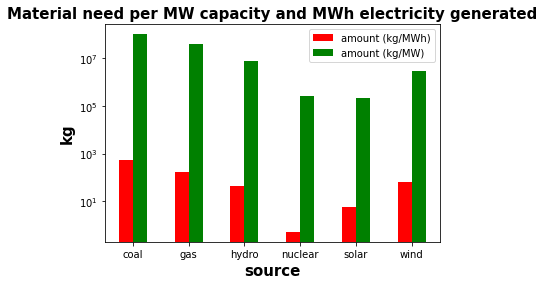

In [31]:
ax = total_need.plot.bar(x='source', y=['amount (kg/MWh)',"amount (kg/MW)"], color=['red', 'green'], rot=0)
ax.set_yscale('log')
plt.title("Material need per MW capacity and MWh electricity generated",fontweight ='bold', fontsize = 15)
plt.ylabel("kg", fontweight ='bold', fontsize = 15)
plt.xlabel("source", fontweight ='bold', fontsize = 15)
ax.set_facecolor('white')

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.savefig('./plots/barplot_feed.jpg', bbox_inches='tight', dpi=900)

In [32]:
total_front_need=energy_s[energy_s['stream'].str.match('front_need')].groupby(["source"], as_index=False).sum()
total_front_waste=energy_s[energy_s['stream'].str.match('front_waste')].groupby(["source"], as_index=False).sum()
total_oper_need=energy_s[energy_s['stream'].str.match('oper_need')].groupby(["source"], as_index=False).sum()
total_oper_waste=energy_s[energy_s['stream'].str.match('oper_waste')].groupby(["source"], as_index=False).sum()
total_back_waste=energy_s[energy_s['stream'].str.match('back_waste')].groupby(["source"], as_index=False).sum()
del gen['oil']


In [42]:
total_front_need
annual_constr_need=constructions*[1.293910e+05, 2.861319e+06, 2.042597e+05, 7.706588e+06, 2.132855e+05]
annual_constr_need_tot = annual_constr_need.sum(axis=1) #in tons
annual_constr_need_tot.to_frame()
annual_constr_need_tot

2021    25481770.95
2022    12277895.98
2023    77480610.25
2024    97444489.52
2025     6509008.70
2026     7886020.80
2027     6631580.15
2028     3700765.85
2029     4847486.60
2030     2727435.77
2031     4017371.42
2032     4879374.17
2033     4289575.80
2034     3428282.90
2035     4147808.64
2036     3030248.75
2037     2736675.80
2038     4605704.27
2039     1885244.05
2040     3233905.85
2041     4646277.64
2042     1819884.52
2043     4224158.47
2044     6297327.32
2045     7987536.47
2046     6742864.57
2047     8488095.00
2048     2955930.65
2049     9437006.60
2050    10168709.97
dtype: float64

In [34]:
total_front_waste
annual_constr_waste=constructions*[5.773516e+04, 1.450864e+06, 5.885931e+06, 3.887562e+06, 7.657879e+06]
annual_constr_waste_tot = annual_constr_waste.sum(axis=1) #in tons
annual_constr_waste_tot.to_frame()
annual_constr_waste_tot

,source,amount (kg/MW),amount (kg/MWh)
0,coal,1.088788e+05,0.591861
1,gas,5.773516e+04,0.258462
2,hydro,3.887562e+06,21.335846
3,nuclear,5.885931e+06,12.442777
4,solar,7.657879e+06,194.263809
5,wind,1.450864e+06,33.124744


In [50]:
total_oper_need
annual_oper_need=gen*1000*[545,172.8,0.075434,0.097416,0, 0.175951]
annual_oper_need_tot= annual_oper_need.sum(axis=1) #in tons
annual_oper_need_tot.to_frame()

,0
2020,6.523287e+08
2021,7.084983e+08
2022,7.366427e+08
2023,6.814203e+08
2024,6.301106e+08
2025,6.008482e+08
2026,6.159627e+08
2027,6.046169e+08
2028,6.040628e+08
2029,6.042667e+08


In [47]:
gen #bil KWh = 1000 000 MWh - numbers will be in 1000 ton/MWh 

,coal,gas,wind,nuclear,hydro,solar
2020,756.0,1390.0,342.0,785.0,281.9,81.9
2021,925.0,1182.0,401.8,761.0,280.3,109.3
2022,976.0,1184.0,412.8,737.0,286.9,139.8
2023,855.0,1246.0,484.6,750.0,294.3,152.9
2024,764.0,1236.0,600.6,753.0,294.5,176.8
2025,690.0,1300.0,625.8,745.0,294.0,218.2
2026,706.0,1337.0,628.4,659.0,294.1,270.0
2027,682.0,1347.0,631.8,645.0,294.2,311.4
2028,687.0,1328.0,634.3,645.0,294.1,333.7
2029,688.0,1326.0,636.3,630.0,294.1,366.5


In [49]:
total_oper_waste
annual_oper_w=gen*1000*[2950.110300,446.05490,0.075434,15.336129,0, 0.175951]
annual_oper_w_tot= annual_oper_w.sum(axis=1) #in tons
annual_oper_w_tot.to_frame()

,0
2020,2.862379e+09
2021,3.267809e+09
2022,3.418795e+09
2023,3.089694e+09
2024,2.816833e+09
2025,2.626958e+09
2026,2.689355e+09
2027,2.622805e+09
2028,2.629085e+09
2029,2.630919e+09


In [37]:
total_back_waste
annual_decomissions=decommissions*[2.103808e+05,2.042597e+05]
annual_decomissions_tot= annual_decomissions.sum(axis=1) #in tons
annual_decomissions_tot.to_frame()

,source,amount (kg/MW),amount (kg/MWh)
0,coal,2.103808e+05,1.143623
1,gas,1.292360e+05,0.578548
2,hydro,8.004730e+06,43.931827
3,nuclear,2.042597e+05,0.431802
4,solar,1.476455e+05,3.745446
5,wind,1.746663e+04,0.398782


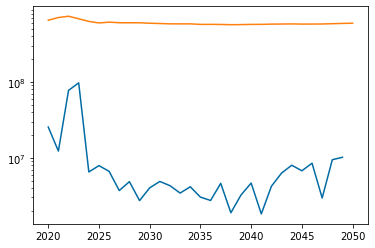

In [52]:
ax = annual_constr_need_tot.plot()
annual_oper_need_tot.plot(ax=ax)
ax.set_yscale('log')

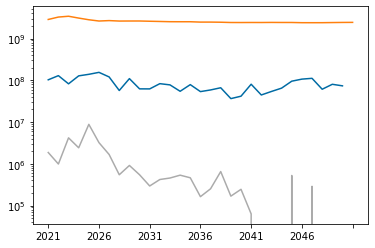

In [51]:
ax = annual_constr_waste_tot.plot()
annual_oper_w_tot.plot(ax=ax)
annual_decomissions_tot.plot(ax=ax)
ax.set_yscale('log')

In [ ]:
decom_annual.mul(decom_annual["amount (kg/MW)"], axis=0)

In [ ]:
total_front_waste=energy_s[energy_s['stream'].str.match('front_waste')]
total_back_waste=energy_s[energy_s['stream'].str.match('back_waste')]
total_oper_waste=energy_s[energy_s['stream'].str.match('oper_waste')]
total_front_need=energy_s[energy_s['stream'].str.match('front_need')]
total_back_need=energy_s[energy_s['stream'].str.match('back_need')]
total_oper_need=energy_s[energy_s['stream'].str.match('oper_need')]

# Material Demand Timeseries

In [ ]:
mats = energy_s['material'].unique()
len(mats)


97

In [ ]:
gen.head(2) # 1e9 kwh

,coal,gas,wind,nuclear,hydro,solar
2020,756.0,1390.0,342.0,785.0,281.9,81.9
2021,925.0,1182.0,401.8,761.0,280.3,109.3


In [ ]:
elec_gen.head(2)

,coal,gas,wind,nuclear,hydro,oil,solar
2020,217.3,245.4,126.5,97.1,79.2,72.6,48.5
2021,212.9,248.7,134.1,92.5,79.3,71.5,60.4


In [ ]:
energy_s_front_need=energy_s[energy_s['stream'].str.match('front_need')]
energy_s_front_waste=energy_s[energy_s['stream'].str.match('front_waste')]
energy_s_back_waste =energy_s[energy_s['stream'].str.match('back_waste')]

# Materials visualizations

In [ ]:
plotdata= energy_s_front_need
plotdata.head(2)

,source,stream,material,amount (kg/MW),amount (kg/MWh),coordinate
3,gas,front_need,iron,31438.0,0.140738,"(31.0069,-88.0103)"
4,gas,front_need,concrete,97749.0,0.437591,"(31.0069,-88.0103)"


In [ ]:
cm = plt.get_cmap('nipy_spectral')

In [ ]:
gas = energy_s_front_need[energy_s_front_need["source"].str.match('gas')]
gas

,source,stream,material,amount (kg/MW),amount (kg/MWh),coordinate
3,gas,front_need,iron,31438.0,0.140738,"(31.0069,-88.0103)"
4,gas,front_need,concrete,97749.0,0.437591,"(31.0069,-88.0103)"
5,gas,front_need,aluminum,204.0,0.000913,"(31.0069,-88.0103)"


In [ ]:
import plotly.express as px
 
fn = energy_s_front_need

fig = px.bar(fn, x="source", y="amount (kg/MW)", color="material",
            hover_data=['source'], barmode = 'stack')
 
fig.show()

In [ ]:
import plotly.express as px
 
fw= energy_s_front_waste

fig = px.bar(fw, x="source", y="amount (kg/MW)", color="material",
            hover_data=['source'], barmode = 'stack')
 
fig.show()

In [ ]:
bw= energy_s_back_waste

fig = px.bar(bw, x="source", y="amount (kg/MW)", color="material",
            hover_data=['source'], barmode = 'stack')
 
fig.show()

# Materials heatmap

In [ ]:
energy_s_front_need_m = fn.groupby(["source","material"]).size().unstack(level=0)



In [ ]:
energy_s_front_waste_m = fw.groupby(["source","material"]).size().unstack(level=0)


In [ ]:
fnMW=energy_s_front_need[['material','source','amount (kg/MW)']]
fn_MWh=energy_s_front_need[['material','source','amount (kg/MWh)']]

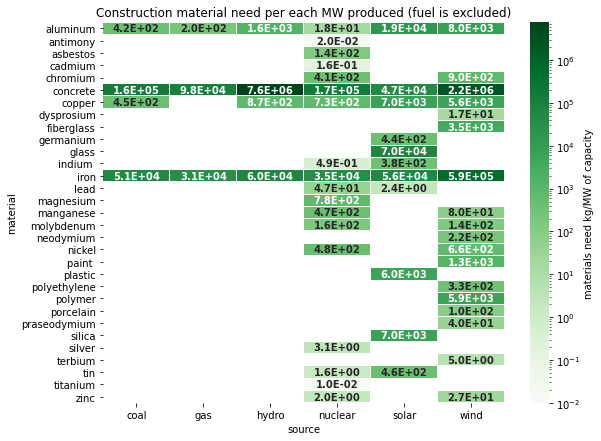

In [ ]:
from matplotlib.colors import LogNorm, Normalize

#plt.style.use('tableau-colorblind10')


plt.figure(figsize=(9,7))
fn1=energy_s_front_need.pivot(index='material', columns='source', values='amount (kg/MW)')

sns.heatmap(fn1,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True,cmap = 'Greens', cbar_kws={'label': 'materials need kg/MW of capacity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Construction material need per each MW produced (fuel is excluded)")
plt.savefig('./plots/front_need_MW_heatmap_n.jpg', bbox_inches='tight', dpi=900)

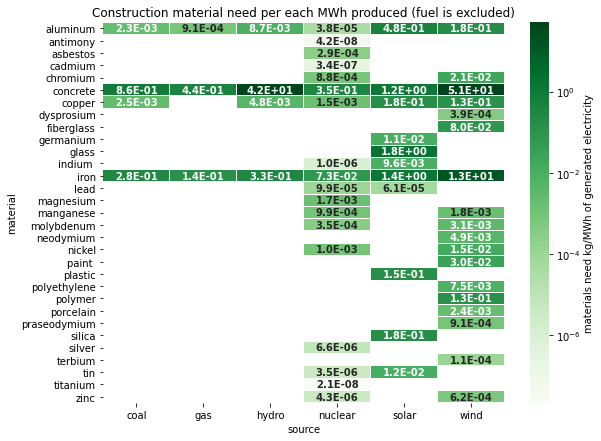

In [ ]:
from matplotlib.colors import LogNorm, Normalize

#plt.style.use('tableau-colorblind10')


plt.figure(figsize=(9,7))
fn1=energy_s_front_need.pivot(index='material', columns='source', values='amount (kg/MWh)')

sns.heatmap(fn1,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True,cmap = 'Greens', cbar_kws={'label': 'materials need kg/MWh of generated electricity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Construction material need per each MWh produced (fuel is excluded)")
plt.savefig('./plots/front_need_MWh_heatmap_n.jpg', bbox_inches='tight', dpi=900)

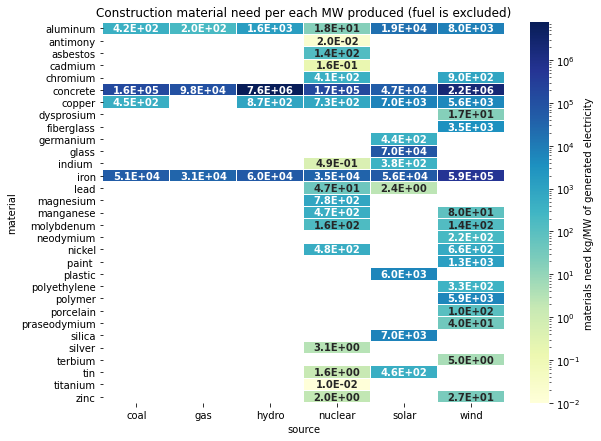

In [ ]:
from matplotlib.colors import LogNorm, Normalize

plt.figure(figsize=(9,7))
fn1=energy_s_front_need.pivot(index='material', columns='source', values='amount (kg/MW)')

sns.heatmap(fn1,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True, cmap="YlGnBu", cbar_kws={'label': 'materials need kg/MW of generated electricity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Construction material need per each MW produced (fuel is excluded)")
plt.savefig('./plots/front_need_MW_heatmap.jpg', bbox_inches='tight')


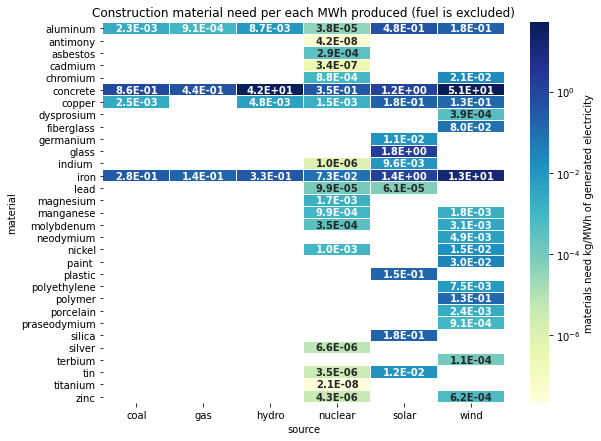

In [ ]:
from matplotlib.colors import LogNorm, Normalize

plt.figure(figsize=(9,7))
fn2=energy_s_front_need.pivot(index='material', columns='source', values='amount (kg/MWh)')

sns.heatmap(fn2,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True, cmap="YlGnBu", cbar_kws={'label': 'materials need kg/MWh of generated electricity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Construction material need per each MWh produced (fuel is excluded)")
plt.savefig('./plots/front_need_MWh_heatmap.jpg', bbox_inches='tight')

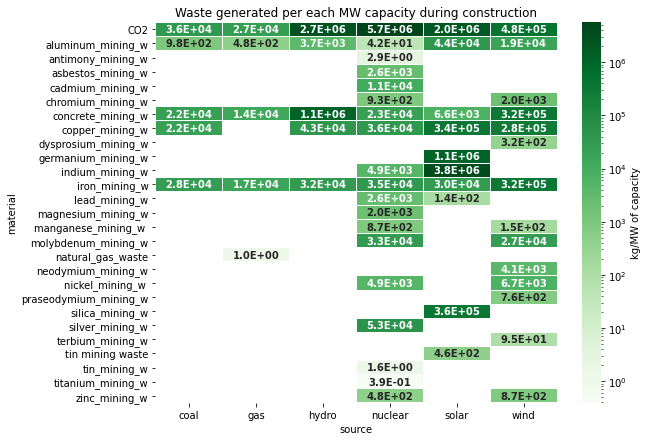

In [ ]:

plt.figure(figsize=(9,7))

#plt.style.use('tableau-colorblind10')

fw1=fw.pivot(index='material', columns='source', values='amount (kg/MW)')

sns.heatmap(fw1,  annot=True, fmt='.1E',cmap = 'Greens', cbar_kws={'label': 'kg/MW of capacity'},
            norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Waste generated per each MW capacity during construction")
plt.savefig('./plots/front_waste_heatmap_n.jpg', bbox_inches='tight', dpi=900)

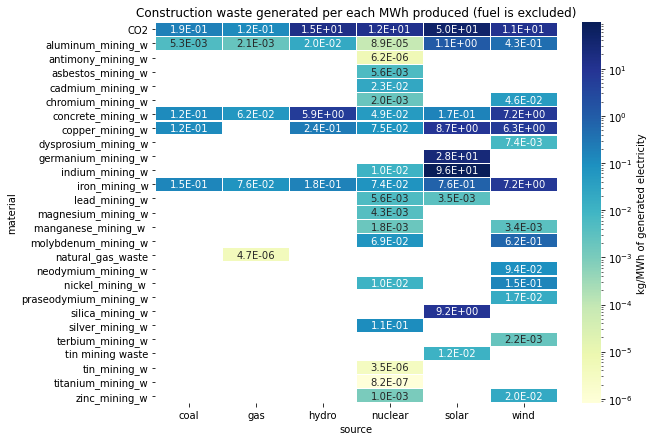

In [ ]:

plt.figure(figsize=(9,7))
df1=energy_s_front_waste.pivot(index='material', columns='source', values='amount (kg/MWh)')

sns.heatmap(df1,  annot=True, fmt='.1E', cmap="YlGnBu", cbar_kws={'label': 'kg/MWh of generated electricity'},
            norm=LogNorm(), linewidth=0.2)
plt.title("Construction waste generated per each MWh produced (fuel is excluded)")
plt.savefig('./plots/front_wasteMWh_heatmap_1.jpg', bbox_inches='tight', dpi=900)

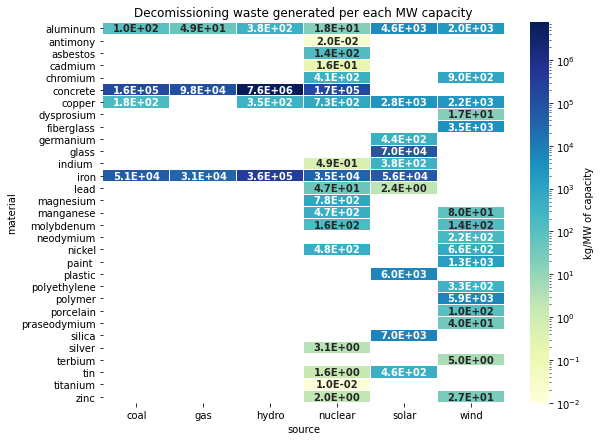

In [ ]:

plt.figure(figsize=(9,7))
df1=energy_s_back_waste.pivot(index='material', columns='source', values='amount (kg/MW)')

sns.heatmap(df1,  annot=True, fmt='.1E', cmap="YlGnBu", cbar_kws={'label': 'kg/MW of capacity'},
            norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Decomissioning waste generated per each MW capacity")
plt.savefig('./plots/back_wasteMW_heatmap.jpg', bbox_inches='tight')

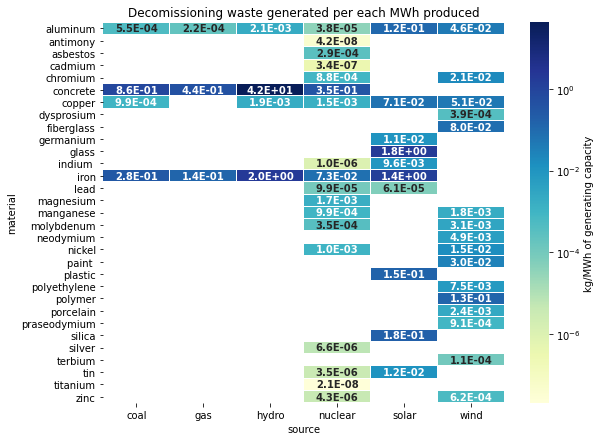

In [ ]:

plt.figure(figsize=(9,7))
df1=energy_s_back_waste.pivot(index='material', columns='source', values='amount (kg/MWh)')
sns.heatmap(df1,  annot=True, fmt='.1E', cmap="YlGnBu", cbar_kws={'label': 'kg/MWh of generating capacity'},
            norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Decomissioning waste generated per each MWh produced")
plt.savefig('./plots/back_waste_heatmapMWH.jpg', bbox_inches='tight')

# Plot cumulative material flow

In [ ]:
needed_i = np.array(energy_s_front_waste["source"].drop_duplicates()) 
columns = np.array(energy_s_front_waste["material"].drop_duplicates())

In [ ]:
needed_i = np.array(energy_s[energy_s['stream'].str.match('front_waste')]["source"].drop_duplicates())
columns = np.array(energy_s[energy_s['stream'].str.match('front_waste')]["material"].drop_duplicates())

In [ ]:
df=energy_s[energy_s['stream'].str.match('front_waste')].pivot(index='material', columns='source', values='amount (kg/MW)')

In [ ]:
df =df.fillna(0).astype(np.int64)

In [ ]:
df_front_waste =energy_s_front_waste.pivot(index='material', columns='source', values='amount (kg/MW)').fillna(0)
df_back_waste =energy_s_back_waste.pivot(index='material', columns='source', values='amount (kg/MW)').fillna(0)
df_front_need =energy_s_front_need.pivot(index='material', columns='source', values='amount (kg/MW)').fillna(0)

In [ ]:
total_change=elec_gen.agg(lambda x: x.iat[-1] - x.iat[0]).reset_index(name='diff')

In [ ]:
total_change.columns=['source',"total change"]
total_change["total change"]=total_change["total change"].astype(float)

In [ ]:
tot_constructions = total_change[(total_change["total change"] > 0)]
tot_decom = total_change[(total_change["total change"] < 0)]


In [ ]:
tot_decom=tot_decom.T
tot_decom

,0,4,6
source,coal,nuclear,oil&gas
total change,-115.2,-24.8,-29.3


In [ ]:
tot_constructions

,source,total change
1,gas,149.3
2,wind,90.5
3,diesel,164.3
5,hydro,0.1
7,solar,302.8


In [ ]:
two_year= elec_gen.iloc[[0, 29],:]
two_year

,coal,gas,wind,diesel,nuclear,hydro,oil&gas,solar
2020,217.3,245.4,126.5,140.0,97.1,79.2,72.6,48.5
2049,102.1,388.6,214.4,297.9,72.2,79.3,43.3,342.3


In [ ]:
two_year["hydro"][0]* df_front_waste["hydro"]

material
aluminum_mining_w        2.929467e+05
antimony_mining_w        0.000000e+00
asbestos_mining_w        0.000000e+00
cadmium_mining_w         0.000000e+00
chromium_mining_w        0.000000e+00
concrete_mining_w        8.518046e+07
copper_mining_w          3.394141e+06
dysprosium_mining_w      0.000000e+00
germanium_mining_w       0.000000e+00
indium_mining_w          0.000000e+00
iron_mining_w            2.564255e+06
lead_mining_w            0.000000e+00
magnesium_mining_w       0.000000e+00
manganese_mining_w       0.000000e+00
molybdenum_mining_w      0.000000e+00
neodymium_mining_w       0.000000e+00
nickel_mining_w          0.000000e+00
praseodymium_mining_w    0.000000e+00
silica_mining_w          0.000000e+00
silver_mining_w          0.000000e+00
terbium_mining_w         0.000000e+00
tin mining waste         0.000000e+00
tin_mining_w             0.000000e+00
titanium_mining_w        0.000000e+00
zinc_mining_w            0.000000e+00
Name: hydro, dtype: float64

In [ ]:
front_w2021=[]
front_w2025=[]
front_n2025=[]
back_w2025=[]
front_n2021=[]
back_w2021=[]
for i in needed_i:

    fw2021 =df_front_waste[str(i)]*two_year[str(i)][0]
    bw2021 = df_back_waste[str(i)]*two_year[str(i)][0]
    fn2021 = df_front_need[str(i)]*two_year[str(i)][0]
    fw2025 =df_front_waste[str(i)]*two_year[str(i)][1]
    bw2025 = df_back_waste[str(i)]*two_year[str(i)][1]
    fn2025 = df_front_need[str(i)]*two_year[str(i)][1]

    front_w2021.append(fw2021)
    front_n2021.append(fn2021)
    back_w2021.append(bw2021)
    front_w2025.append(fw2025)
    front_n2025.append(fn2025)
    back_w2025.append(bw2025)
    
front_w2021= pd.concat(front_w2021, axis=1)
front_n2021= pd.concat(front_n2021, axis=1)
back_w2021= pd.concat(back_w2021, axis=1)
front_w2025= pd.concat(front_w2025, axis=1)
front_n2025= pd.concat(front_n2025, axis=1)
back_w2025= pd.concat(back_w2025, axis=1)

In [ ]:
diff_front_w2025 = front_w2025 - front_w2021
diff_front_n2025 = front_n2025 - front_n2021
diff_back_w2025 =back_w2025 - back_w2021
constr_need = diff_front_n2025[["wind", "hydro", "solar"]]  
constr_waste = diff_front_w2025[["wind", "hydro", "solar"]] 
decom = abs(diff_back_w2025[["coal", "nuclear"]])    

In [ ]:
constr_need.reset_index()
constr_need = constr_need.T
constr_need

material,aluminum,antimony,asbestos,cadmium,chromium,concrete,copper,dysprosium,fiberglass,germanium,...,polymer,porcelain,praseodymium,silica,silver,terbium,tin,titanium,vegetable_oil,zinc
wind,7.055557e+05,0.0,0.0,0.0,79285.8,197458560.0,4.940312e+05,1494.3,306841.32,0.0,...,517555.2,9227.742,3516.0,0.0,0.0,439.5,0.00,0.0,0.0,2371.75296
hydro,1.585210e+02,0.0,0.0,0.0,0.0,764400.0,8.745984e+01,0.0,0.00,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00000
solar,5.582200e+06,0.0,0.0,0.0,0.0,13808600.0,2.056600e+06,0.0,0.00,129272.0,...,0.0,0.000,0.0,2056600.0,0.0,0.0,136058.78,0.0,1763093.8,0.00000


In [ ]:
constr_waste.reset_index()
constr_waste = constr_waste.T
constr_waste

material,aluminum_mining_w,antimony_mining_w,asbestos_mining_w,cadmium_mining_w,chromium_mining_w,concrete_mining_w,copper_mining_w,dysprosium_mining_w,germanium_mining_w,indium_mining_w,...,neodymium_mining_w,nickel_mining_w,praseodymium_mining_w,silica_mining_w,silver_mining_w,terbium_mining_w,tin mining waste,tin_mining_w,titanium_mining_w,zinc_mining_w
wind,1.646297e+06,0.0,0.0,0.0,177968.580285,2.778242e+07,2.420753e+07,28391.7,0.0,0.000000e+00,...,360741.6,589607.806657,66804.0,0.0,0.0,8350.5,0.00,0.0,0.0,76686.679037
hydro,3.698822e+02,0.0,0.0,0.0,0.000000,1.075511e+05,4.285532e+03,0.0,0.0,0.000000e+00,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000
solar,1.302513e+07,0.0,0.0,0.0,0.000000,1.942870e+06,1.007734e+08,0.0,323050728.0,1.116328e+09,...,0.0,0.000000,0.0,106649400.0,0.0,0.0,136058.78,0.0,0.0,0.000000


In [ ]:
decom.reset_index()
decom = decom.T
decom

material,aluminum,antimony,asbestos,cadmium,chromium,concrete,copper,dysprosium,fiberglass,germanium,...,polyethylene,polymer,porcelain,praseodymium,silica,silver,terbium,tin,titanium,zinc
coal,11584.512,0.000,0.000,0.000,0.000,1.828892e+07,20920.320,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000
nuclear,449.943,0.498,3442.176,3.984,10329.765,4.142082e+06,18070.179,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,77.688,0.0,40.836,0.249,50.298


In [ ]:
import copy
newdf1 = copy.deepcopy(constr_waste)
for i in list(constr_waste):
    if sum(constr_waste[i]) == 0:
        newdf1 = newdf1.drop(i, axis=1)
newdf1

material,aluminum_mining_w,chromium_mining_w,concrete_mining_w,copper_mining_w,dysprosium_mining_w,germanium_mining_w,indium_mining_w,iron_mining_w,lead_mining_w,manganese_mining_w,molybdenum_mining_w,neodymium_mining_w,nickel_mining_w,praseodymium_mining_w,silica_mining_w,terbium_mining_w,tin mining waste,zinc_mining_w
wind,1.646297e+06,177968.580285,2.778242e+07,2.420753e+07,28391.7,0.0,0.000000e+00,2.783335e+07,0.000000,13141.05,2389420.86,360741.6,589607.806657,66804.0,0.0,8350.5,0.00,76686.679037
hydro,3.698822e+02,0.000000,1.075511e+05,4.285532e+03,0.0,0.0,0.000000e+00,3.237696e+03,0.000000,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000
solar,1.302513e+07,0.000000,1.942870e+06,1.007734e+08,0.0,323050728.0,1.116328e+09,8.859200e+06,40006.196388,0.00,0.00,0.0,0.000000,0.0,106649400.0,0.0,136058.78,0.000000


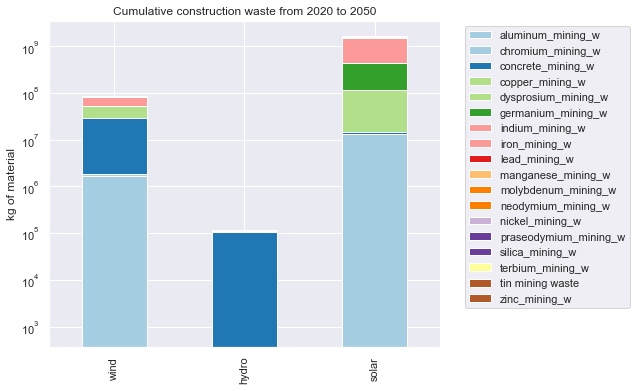

In [ ]:
newdf1.plot(kind="bar", stacked=True, colormap='Paired', figsize=(7,6))
plt.title("Cumulative construction waste from 2020 to 2050")
# plt.xlabel("electricity source")
plt.ylabel("kg of material")
#plt.yscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./plots/waste_const_cumulative.jpg', bbox_inches='tight')

In [ ]:
newdf2 = copy.deepcopy(decom)
for i in list(decom):
    if sum(decom[i]) == 0:
        newdf2 = newdf2.drop(i, axis=1)
newdf2

material,aluminum,antimony,asbestos,cadmium,chromium,concrete,copper,indium,iron,lead,magnesium,manganese,molybdenum,nickel,silver,tin,titanium,zinc
coal,11584.512,0.000,0.000,0.000,0.000,1.828892e+07,20920.320,0.000,5.914447e+06,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
nuclear,449.943,0.498,3442.176,3.984,10329.765,4.142082e+06,18070.179,12.201,8.630910e+05,1161.585,19481.262,11637.264,4075.134,12060.066,77.688,40.836,0.249,50.298


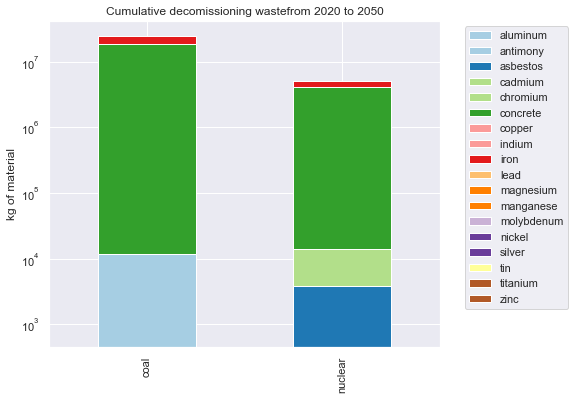

In [ ]:
newdf2.plot(kind="bar", stacked=True, colormap='Paired', figsize=(7,6))
plt.title("Cumulative decomissioning wastefrom 2020 to 2050")
# plt.xlabel("electricity source")
plt.ylabel("kg of material")
#plt.yscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./plots/waste_decom_cumulative.jpg', bbox_inches='tight')

In [ ]:
list(decommission)

['coal', 'nuclear', 'oil&gas']

In [ ]:
constr_need = constr_need.drop('hydro', axis=0)

In [ ]:
newdf = copy.deepcopy(constr_need)
for i in list(constr_need):
    if sum(constr_need[i]) == 0:
        newdf = newdf.drop(i, axis=1)       

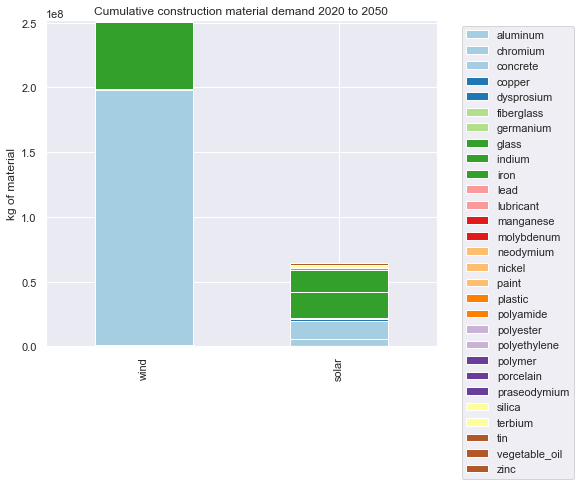

In [ ]:

newdf.plot(kind="bar", stacked=True, colormap='Paired', figsize=(7,6))

plt.title("Cumulative construction material demand 2020 to 2050")
# plt.xlabel("electricity source")
plt.ylabel("kg of material")
#plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./plots/construction_cumulative.jpg', bbox_inches='tight')


# Plot total material flow 

In [ ]:
constructions.head(2) # GW

,gas,wind,diesel,nuclear,hydro,oil&gas,solar
2021,3.3,7.6,11.4,0.0,0.1,0.0,11.9
2022,12.6,2.5,6.1,0.4,0.0,0.0,16.0


In [ ]:
decommission.head(2) # GW

,coal,nuclear,oil&gas
2021,4.4,4.6,1.1
2022,4.7,0.0,4.9


In [ ]:
energy_s['source'].unique()

array(['gas', 'hydro', 'coal', 'wind', 'solar', 'nuclear'], dtype=object)

In [ ]:
gen.columns = ['coal', 'gas', 'wind', 'nuclear', 'hydro', 'oil&gas', 'solar']


In [ ]:
arr.shape

(6, 31, 97)

In [ ]:
list(energy_s)

['source',
 'stream',
 'material',
 'amount (kg/MW)',
 'amount (kg/MWh)',
 'facility',
 'ore grade',
 'mining waste kg/MW',
 'recycling factor',
 'bib',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19']

In [ ]:
energy_s.head(2)

,source,stream,material,amount (kg/MW),amount (kg/MWh),facility,ore grade,mining waste kg/MW,recycling factor,bib,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,gas,back_waste,aluminum,48.96,0.000219,NaN,NaN,NaN,NaN,"n@TECHREPORT{Spath2000-qg,\n title = \""Life cy...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gas,back_waste,iron,31438.00,0.140738,NaN,NaN,NaN,NaN,"n@TECHREPORT{Spath2000-qg,\n title = \""Life cy...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
constructions.loc['2021']

gas         3.3
wind        7.6
diesel     11.4
nuclear     0.0
hydro       0.1
oil&gas     0.0
solar      11.9
Name: 2021, dtype: float64

In [ ]:
arr.shape

(6, 31, 97)

In [ ]:
gen.loc['2021']

coal        925.0
gas        1182.0
wind        401.8
nuclear     761.0
hydro       280.3
oil&gas      10.0
solar       109.3
Name: 2021, dtype: float64

In [ ]:
mats = list(mats)
mats

['aluminum',
 'iron',
 'concrete',
 'iron_mining_w',
 'natural_gas_waste',
 'aluminum_mining_w',
 'concrete_mining_w',
 'natural_gas',
 'coal',
 'oil',
 'limestone ',
 'NH3',
 'SOx',
 'NMHCs',
 'NOx',
 'CO',
 'particulates',
 'CO2',
 'formaldehyde',
 'methane leak',
 'benzene',
 'H2S',
 'copper_mining_w',
 'copper',
 'lime_mining_w',
 'lime_FGC',
 'antimony',
 'arsenic',
 'barium',
 'beryllium',
 'boron',
 'cadmium',
 'chromium',
 'cobalt',
 'lead',
 'manganese',
 'mercury',
 'molybdenum',
 'nickel',
 'selenium',
 'vanadium',
 'ash',
 'VOC',
 'FGC',
 'coal_mining_w',
 'zinc',
 'fiberglass',
 'paint ',
 'polyethylene',
 'polymer',
 'porcelain',
 'neodymium',
 'praseodymium',
 'terbium',
 'dysprosium',
 'zinc_mining_w',
 'neodymium_mining_w',
 'praseodymium_mining_w',
 'terbium_mining_w',
 'dysprosium_mining_w',
 'chromium_mining_w',
 'manganese_mining_w ',
 'molybdenum_mining_w',
 'nickel_mining_w ',
 'lubricant',
 'silica_mining_w',
 'germanium_mining_w',
 'indium_mining_w',
 'lead_min

In [ ]:
# (df) generation
# (df) energy_s

mats = list(mats)
years = list(gen.index)[1:]
arr = np.zeros((len(energy_s['source'].unique()), len(years), len(mats)))

# material demand
#####
# for each year
for yearindx, year in enumerate(years): # indx 1
    for source_indx, source in enumerate(energy_s['source'].unique()): # indx 0
        tmpdf = energy_s[energy_s['source'] == source]
        
        # MW
        if source in list(constructions):
            constructed = constructions.loc[str(year)][source] * 1e3 #MW from GW
        else:
            constructed = 0
        if source in list(decommission):
            decommissioned = decommission.loc[str(year)][source] * 1e3
        else:
            decommissioned = 0
            
        # MWh
        if source in list(gen):
            generated = gen.loc[str(year)][source] * 1e6
        else:
            generated = 0
        
        #print(source)
        # get construction demand in kg
        tmpdf2 = tmpdf[tmpdf['stream'] == 'front_need']
        for rownum, row in tmpdf2.iterrows():
            
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * constructed #kg
            arr[source_indx, yearindx, mat_index] += val
            

        # get decommission demand in kg
        tmpdf3 = tmpdf[tmpdf['stream'] == 'back_need']
        for rownum, row in tmpdf3.iterrows():
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * decommissioned # kg 
            arr[source_indx, yearindx, mat_index] += val
        
        # get operational demand in kg
        tmpdf4 = tmpdf[tmpdf['stream'] == 'oper_need']
        for rownum, row in tmpdf4.iterrows():
            mat_index = mats.index(row['material'])
            # kg / MWh
            val = row['amount (kg/MW)'] * generated # kg
            arr[source_indx, yearindx, mat_index] += val


In [ ]:
arr.shape

(6, 30, 97)

In [ ]:
bot = np.zeros(len(years))
import matplotlib.pylab as pl
n = 47
colors = pl.cm.jet(np.linspace(0,1,n))
plt.figure(figsize=(10,10))
for i in range(per_mat.shape[1]):
    y = np.cumsum(per_mat[:, i])
    label = mats[i]
    x = [int(q) for q in years]
    plt.plot(x, y, label=label, color=colors[i])
    # plt.bar(x, y, bottom=bot, label=label)
    bot += y

per_mat = np.sum(arr, axis=0)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.ylabel("kg of material")
plt.xlabel("year")
#plt.rcParams['axes.facecolor'] = 'white'
plt.xlim([2021,2050])
#plt.rcParams['axes.facecolor'] = 'white'
plt.yscale('log')

plt.title('Material demand for increasing capacity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



NameError: name 'per_mat' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
mats = list(mats)

years = list(gen.index)[1:]

arr = np.zeros((len(energy_s['source'].unique()), len(years), len(mats)))

# material demand
#####
# for each year
for yearindx, year in enumerate(years): # indx 1
    for source_indx, source in enumerate(energy_s['source'].unique()): # indx 0
        tmpdf = energy_s[energy_s['source'] == source]
        
        # MW
        if source in list(constructions):
            constructed = constructions.loc[str(year)][source] * 1e3
        else:
            constructed = 0
        if source in list(decommission):
            decommissioned = decommission.loc[str(year)][source] * 1e3
        else:
            decommissioned = 0
            
        # MWh
        if source in list(gen):
            generated = gen.loc[str(year)][source] * 1e6
        else:
            generated = 0
        
        print(source)
        # get construction waste in kg
        tmpdf2 = tmpdf[tmpdf['stream'] == 'front_waste']
        for rownum, row in tmpdf2.iterrows():
            
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * constructed #kg
            arr[source_indx, yearindx, mat_index] += val
            

        # get decommission waste in kg
        tmpdf3 = tmpdf[tmpdf['stream'] == 'back_waste']
        for rownum, row in tmpdf3.iterrows():
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * decommissioned # kg 
            arr[source_indx, yearindx, mat_index] += val
        
        # get operational waste in kg
        tmpdf4 = tmpdf[tmpdf['stream'] == 'oper_waste']
        for rownum, row in tmpdf4.iterrows():
            mat_index = mats.index(row['material'])
            # kg / MWh
            val = row['amount (kg/MW)'] * generated # kg
            arr[source_indx, yearindx, mat_index] += val

gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal
wind
solar
nuclear
gas
hydro
coal

In [ ]:
# arr # kg
bot = np.zeros(len(years))
n = 47
colors = pl.cm.jet(np.linspace(0,1,n))
plt.figure(figsize=(10,10))
for i in range(per_mat.shape[1]):
    y = np.cumsum(per_mat[:, i])
    label = mats[i]
    x = [int(q) for q in years]
    plt.plot(x, y, label=label, color=colors[i])
    # plt.bar(x, y, bottom=bot, label=label)
    bot += y

per_mat = np.sum(arr, axis=0)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['axes.facecolor'] = 'white'
plt.ylabel("kg of material")
plt.xlabel("year")
plt.xlim([2021,2050])

plt.yscale('log')
plt.title('Waste generation with increasing capacity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

NameError: name 'per_mat' is not defined

<Figure size 720x720 with 0 Axes>